<a href="https://colab.research.google.com/github/linhgiangpham99/TPPQ1/blob/main/Copie_de_TP_PQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from numpy import linalg
from math import sin, pi, sqrt, exp, cos
from scipy.special import airy

In [2]:
def kronecker(n,m): #function defines Kronecker symbol
  if n==m:
    return 1
  else:
    return 0
def v_x (x, alpha): #fonction du  potentiel
  return alpha*x
def function1(x,n,m,R,alpha): 
  return sin(n*pi*x)*sin(m*pi*x)*v_x(x,alpha)

def hamilnorm(n,m,R,alpha): #les éléments normalisés d'Hamiltonien
  return n**2*kronecker(n,m)+2*integrate.quad(function1,0,1,args=(n,m,R,alpha))[0]
def Hamiltonien(N,R,alpha): #la matrice Hamiltonien
  P=np.zeros((N,N))
  for i in range (N):
    for j in range (N):
      P[i,j]=hamilnorm(i+1,j+1,R,alpha) #normalisée
  return P


In [3]:
R=24
N=50
alpha=300 #alpha normalisée

In [4]:
H=Hamiltonien(N,R,alpha)
#print(H)

In [5]:
H1=Hamiltonien(N,R,alpha) #arrondir à 0 pour les valeurs négligeables
for i in range(N):
  for j in range (N):
    if abs(H1[i,j]) <(10e-6):
      H1[i,j]=0


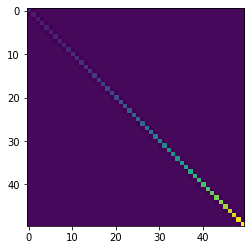

In [6]:
#print(H1)
plt.imshow(H)

In [7]:
def energynorm(R,N,alpha): #energie normalisée
  P=Hamiltonien(N,R,alpha)
  k=np.size(P,0)
  Unsorted=np.linalg.eig(P)[0]
  C=sorted(Unsorted) #sorted eigvalues
  Indexes=list()
  for i in range (N):
    Indexes.append(Unsorted.tolist().index(C[i])) #find the indexes original of eigvalues
  K=np.linalg.eig(P)[1]
  return C,K, Indexes
def energy(R,k): #linear function
  energylist=list()
  for i in range (k):
    energylist.append(R*(i-1/2))
  return energylist
def energyquad(R,N,alpha):#quadratic function and fit
  P=Hamiltonien(N,R,alpha)
  energylist=list()
  def funcquad(n,C):
    return  n**2+C
  popt,pcov=curve_fit(funcquad, [i for i in range(1,np.size(P,0)+1)], energynorm(R,N,alpha)[0][0:np.size(P,0)+1])
  for i in range (N):
    energylist.append((i)**2+popt)
  return energylist

[-12.0, 12.0, 36.0, 60.0, 84.0, 108.0, 132.0, 156.0, 180.0, 204.0, 228.0, 252.0, 276.0, 300.0, 324.0, 348.0, 372.0, 396.0, 420.0, 444.0, 468.0, 492.0, 516.0, 540.0, 564.0, 588.0, 612.0, 636.0, 660.0, 684.0, 708.0, 732.0, 756.0, 780.0, 804.0, 828.0, 852.0, 876.0, 900.0, 924.0, 948.0, 972.0, 996.0, 1020.0, 1044.0, 1068.0, 1092.0, 1116.0, 1140.0, 1164.0]


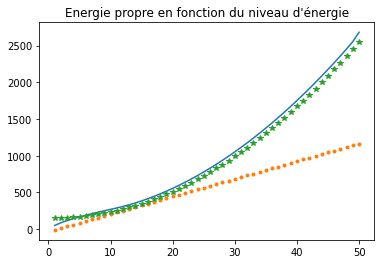

In [8]:
#plot energy normalized in function of states
R=24
N=50
alpha=300
C,K,D= energynorm(R,N,alpha)
#print(C)
plt.plot([i for i in range(1,N+1)],C)
E=energy(R,N)
print(E)
plt.plot([i for i in range(1,N+1)],E,'.')
F=energyquad(R,N,alpha)
plt.plot([i for i in range(1,N+1)],F,'*')
plt.title("Energie propre en fonction du niveau d'énergie")
plt.show()

In [9]:
def prodscar(A,B): #produit scalaire
  p=0
  n=np.size(A)
  #print(n)
  for i in range (n):
    p+=A[i]*B[i]
  return p

In [10]:
def vectorprop(R,N,a,k,alpha): #extraire le vecteur propre pour un k distinct
  indexes= energynorm(R,N,alpha)[2]
  n=indexes[k]
  vectorlist_k=list()
  vectorprop1=energynorm(R,N,alpha)[1]
  for i in range(N):
    vectorlist_k.append(vectorprop1[i,n])
  return vectorlist_k


In [11]:
def bra(x,N): # vecteur de la fonction d'onde
  L=np.zeros(N)
  for i in range(N):
    L[i]=sqrt(2)*sin((i+1)*pi*x)
  return L
def Psi(R,N,step,alpha,k=0,a=1): #k=> choisi n=0,1,2.... # create all the states of the ondular function of a certain level of energy (k)
  vectorproplist=vectorprop(R,N,a,k,alpha)
  vectorlist=np.zeros(step)
  t1 = np.linspace(0, a, step)
  for j in range (step):
    vectorlist[j]= prodscar(vectorproplist,bra(t1[j],N))
  return vectorlist




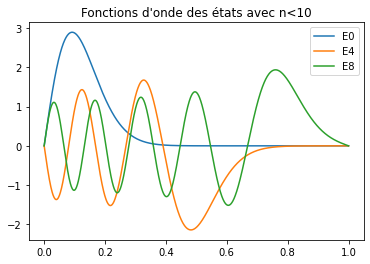

In [12]:
step= 1000
R=24
k=3 #3 niveaux d'énergie
#fig,axs=plt.subplots(1,(k))
i=0
v0=300
N=50
a=1
for j in range (0,10,4):
  vector=Psi(R,N,step,alpha,j)
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label='E'+ str(j))
plt.title("Fonctions d'onde des états avec n<10")
plt.legend(loc = 'upper right')
plt.show()

In [13]:
def defznorm (x, v0, ep, a=1): #z en fonction de x
  return (pi**2*v0)**(1/3)* (x/a-ep/v0)
def airyz(x,v0,ep,C,step=1000,a=1): # fonction Airy en fonction de z
  return C*airy(defznorm(x,v0,ep))[0]

48.85179321375941


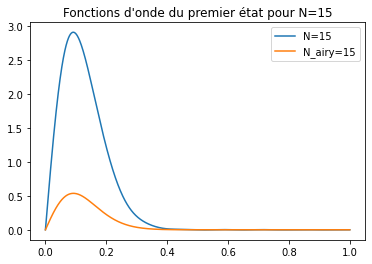

In [14]:
#plot the numerical function and compared with the analyzed function in the topic before fitting
a=1
N=[15]
#N=[3,5,8,15]
#LabelS=["N=3","N=5","N=8","N=15"]
#LabelS1=["N_airy=3","N_airy=5","N_airy=8","N_airy=15"]
LabelS1=["N_airy=15"]
LabelS=["N=15"]
step= 1000
R=24
k=3 #3 niveaux d'énergie
i=0
v0=300
for j in range (len(N)):
  vector=Psi(R,N[j],step,alpha,i)
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label=LabelS[j])
  eplist= energynorm(R,N[j],alpha)[0]
  ep=eplist[0]
  print(ep)
  t1 = np.linspace(0, a, step)
  ai, aip, bi, bip = airy(defznorm(t1,v0,ep))
  plt.plot(t1,ai,label=LabelS1[j])
plt.title("Fonctions d'onde du premier état pour N=15")
plt.legend(loc = 'upper right')
plt.show()



In [15]:
M=40
step=1000
alpha=300
v0=300
a=1
i=1
Clist=list()
for i in range (3):
  eplist= energynorm(R,N[j],alpha)[0]
  ep=eplist[i]
  popt,pcov=curve_fit(lambda x,C: airyz(x,v0,ep,C), t1, Psi(R,M,step,alpha,i) ) #fitting 
  #print(popt)
  K=abs(popt[0])
  Clist.append(K)
  #print(K)
#print(Clist)
Cfinal=np.mean(Clist) #trouver la constante de normalisation de la fonction d'Airy
print(Cfinal)

4.834080886690489


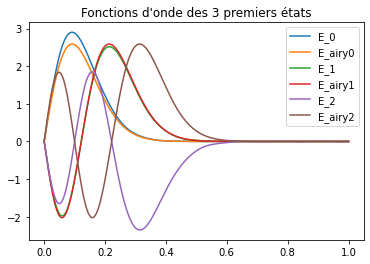

In [16]:
#plot all the wave functions + their fit of Airy functions (3 energy levels) 
a=1
N=[15]
#N=[3,5,8,15]
#LabelS=["N=3","N=5","N=8","N=15"]
#LabelS1=["N_airy=3","N_airy=5","N_airy=8","N_airy=15"]
#LabelS1=["N_airy=15"]
#LabelS=["N=15"]
LabelS=["E_0","E_1","E_2"]
LabelS1=["E_airy0","E_airy1","E_airy2"]
step= 1000
R=24
k=3 #3 niveaux d'énergie
i=0
v0=300
for i in range(k):
  for j in range (len(N)):
    vector=Psi(R,N[j],step,alpha,i)
    t1 = np.linspace(0, a, step)
    plt.plot(t1, vector, label=LabelS[i])
    eplist= energynorm(R,N[j],alpha)[0]
    ep=eplist[i]
    ai = airyz(t1,v0,ep,Cfinal)
    plt.plot(t1,ai,label=LabelS1[i])
plt.title("Fonctions d'onde des 3 premiers états")
plt.legend(loc = 'upper right')
plt.show()

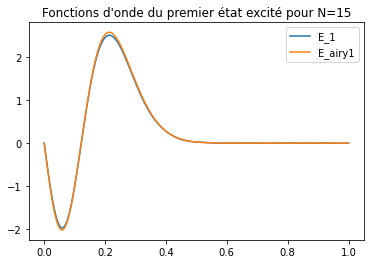

In [17]:
N=[15]
i=1
for j in range (len(N)):
  vector=Psi(R,N[j],step,alpha,i)#fonction d'onde numérique
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector,label=LabelS[i]) # fonction numérique
  eplist= energynorm(R,N[j],alpha)[0] #liste de valeurs propres
  ep=eplist[i] #extraire l'énergie (la valeur propre)
  ai= airyz(t1,v0,ep,Cfinal) #fonction analytique avec constante de normalisation 
  plt.plot(t1,ai,label=LabelS1[i])
plt.title("Fonctions d'onde du premier état excité pour N=15")
plt.legend(loc = 'upper right')
plt.show()

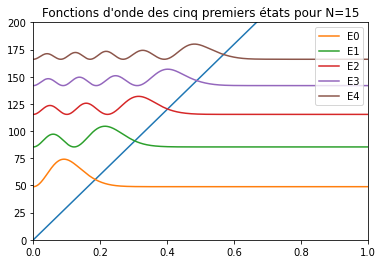

In [18]:
plt.plot(t1,alpha*t1) #étalement des états dans le puits triangulaire
N=15
labelE=['E0','E1','E2','E3','E4']
eplist= energynorm(R,N,alpha)[0]
#print(eplist)
A=3
for i in range(5):
  ep=eplist[i]
  vector=A*abs((Psi(R,N,step,alpha,i))**2)+ep
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label=labelE[i])
plt.title("Fonctions d'onde des cinq premiers états pour N=15")
plt.legend(loc = 'upper right')
plt.axis([0,1,0,200])
plt.show()

In [19]:
def Hamiltonien1(B,theta,g=2,rap=1.76*10**(11)*3,D=5.73*10**9): #Hamiltonien de spin 3/2 sur la base |S,mS>
  B0=B*10**(-4)
  H=np.zeros((4,4))
  H[0,0]=(-2*pi*D-3/4*g*rap*B0*cos(theta*pi/180))/(2*pi)
  H[1,1]=(2*pi*D-1/4*g*rap*B0*cos(theta*pi/180))/(2*pi)
  H[2,2]=(2*pi*D+1/4*g*rap*B0*cos(theta*pi/180))/(2*pi)
  H[3,3]=(-2*pi*D+3/4*g*rap*B0*cos(theta*pi/180))/(2*pi)
  H[0,1]=(sqrt(3)/4*g*rap*B0*sin(theta*pi/180))/(2*pi)
  H[1,0]=(sqrt(3)/4*g*rap*B0*sin(theta*pi/180))/(2*pi)
  H[3,2]=(sqrt(3)/4*g*rap*B0*sin(theta*pi/180))/(2*pi)
  H[2,3]=(sqrt(3)/4*g*rap*B0*sin(theta*pi/180))/(2*pi)
  H[2,1]=1/2*g*rap*B0*sin(theta*pi/180)/(2*pi)
  H[1,2]=1/2*g*rap*B0*sin(theta*pi/180)/(2*pi)
  return H
  


In [20]:
def energyprop(B,theta,g=2,rap=1.76*10**(11)*3,D=5.73*10**9): #energies propres 
  P=Hamiltonien1(B,theta,g,rap,D)
  #print(P)
  k=np.size(P,0)
  Unsorted=np.linalg.eig(P)[0]
  C=sorted(Unsorted)# sorted eigvalues
  Indexes=list()
  for i in range (4):
    Indexes.append(Unsorted.tolist().index(C[i]))
  K=np.linalg.eig(P)[1]
  return C,K, Indexes

In [21]:
def difen(B,theta,g=2,rap=1.76*10**(11)*3,D=5.73*10**9): #delta energy 
  C=energyprop(B,theta,g=2,rap=1.76*10**(11),D=5.73*10**9)[0]
  Diflist=list()
  for i in range(3):
    Diflist.append(abs(C[i+1]-C[i]))
  Diflist.append(abs(C[3]-C[1]))
  Diflist.append(abs(C[2]-C[0]))
  return Diflist


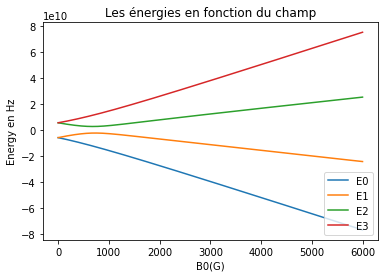

In [22]:
#plot energy in function of magnetism
theta0=50
steps=1000
Bmin=0
Bmax=6000
f=9.19*10**9
b=np.linspace(Bmin, Bmax, steps)
#labeldeE=["E","E2-E1","E3-E2"]
for i in range(4):
  c=list()
  for j in range (steps):
    d=energyprop(b[j],theta0)[0]
    #print(d)
    c.append(d[i])
  #print(c)
  plt.plot(b, c,label="E"+str(i))
  #plt.plot(b, c)
#plt.axhline(f,color='r',label="fréquence de cavité")
plt.title("Les énergies en fonction du champ")
plt.legend(loc = 'lower right')
plt.xlabel("B0(G)")
plt.ylabel("Energy en Hz")
#plt.axis([0,1,0,200])
plt.show()

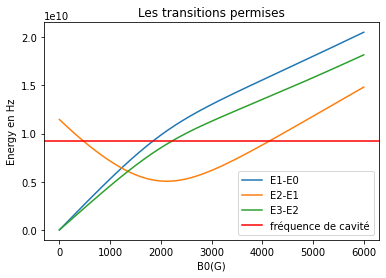

In [23]:
theta0=50
steps=1000
Bmin=0
Bmax=6000
f=9.19*10**9
b=np.linspace(Bmin, Bmax, steps)
labeldeE=["E1-E0","E2-E1","E3-E2"]
for i in range(3):
  c=list()
  for j in range (steps):
    d=difen(b[j],theta0)
    #print(d)
    c.append(d[i])
  #print(c)
  plt.plot(b, c,label=labeldeE[i])
  #plt.plot(b, c)
plt.axhline(f,color='r',label="fréquence de cavité")
plt.title("Les transitions permises")
plt.legend(loc = 'lower right')
plt.xlabel("B0(G)")
plt.ylabel("Energy en Hz")
#plt.axis([0,1,0,200])
plt.show()


In [24]:
def findtransit(): # trouver les transitions possibles
  #theta0=[50]
  pas=50
  theta0=np.linspace(0,90,pas)
  steps=1000
  Bmin=0
  Bmax=6000
  f=9.19*10**9
  b=np.linspace(Bmin, Bmax, steps)
  B=list()
  Thetalist=list()
  for m in range(pas):
    for i in range(5):
      c=list()
      for j in range (steps):
        d=difen(b[j],theta0[m])
      #print(d)
        c.append(d[i])
      for k in range (steps-1):
        if c[k]<=f and c[k+1]>f:
          B.append(b[k])
          Thetalist.append(theta0[m])
        elif c[k]>=f and c[k+1]<f:
          B.append(b[k])
          Thetalist.append(theta0[m])
  #print(Thetalist)
  #print(B)
  return Thetalist, B
   

In [25]:
A,L=findtransit() #A as theta, L as B0
#plt.scatter(A,L,marker="+") #tracer les transitions possibles de la simulation
#plt.show()

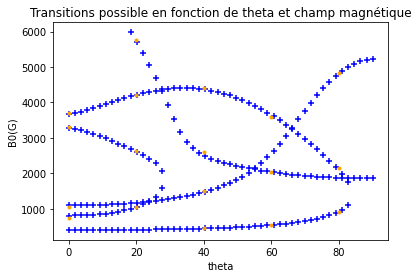

In [28]:
#tracer les transitions possibles de la simulation et superposer avec les valeurs expérimentales
thetaexp=[0,0,0,0,20,20,20,20,40,40,40,40,60,60,60,80,80,80]
B0exp=[750,1050,3700,3300,1050,2620,4220,5750,460,1500,2600,4400,550,2040,3600,900,2140,4820]
plt.scatter(A,L,marker="+",color='b')
plt.title("Transitions possible en fonction de theta et champ magnétique")
plt.scatter(thetaexp,B0exp,marker=".",color='orange')
plt.ylabel("B0(G)")
plt.xlabel("theta")
plt.show()

In [29]:
List1=energyprop(0,50)[0]
print(Hamiltonien1(6000,50))
print(List1)

[[-5.43443026e+10  3.34495210e+10  0.00000000e+00  0.00000000e+00]
 [ 3.34495210e+10 -1.04747675e+10  3.86241799e+10  0.00000000e+00]
 [ 0.00000000e+00  3.86241799e+10  2.19347675e+10  3.34495210e+10]
 [ 0.00000000e+00  0.00000000e+00  3.34495210e+10  4.28843026e+10]]
[-5730000000.0, -5730000000.0, 5730000000.0, 5730000000.0]
